In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
data = pd.read_csv('data_clean.csv')

In [53]:
plt.style.use('seaborn')

# Exploratory Data Analysis

### 1. Which features are more correlated with sales?

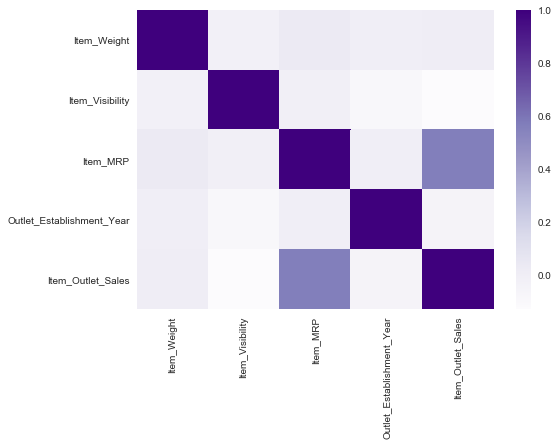

In [584]:
sns.heatmap(data = data.corr(), cmap= 'Purples')

### 2. Top 10 selling item type

In [532]:
top_10_sales = data.groupby('Item_Type')[['Item_Outlet_Sales', 'Item_MRP']].agg({'Item_Outlet_Sales':'sum','Item_MRP':'mean'}).reset_index().sort_values(by = ['Item_Outlet_Sales'], ascending = False)[:10]

In [43]:
#Function to format ylabel to $(amount)k or $(amount)M
def currency(x,pos):
    if x >= 10**6 :
        return '${:1.2f}M'.format(x*1e-6)
    return '${:1.0f}k'.format(x*1e-3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

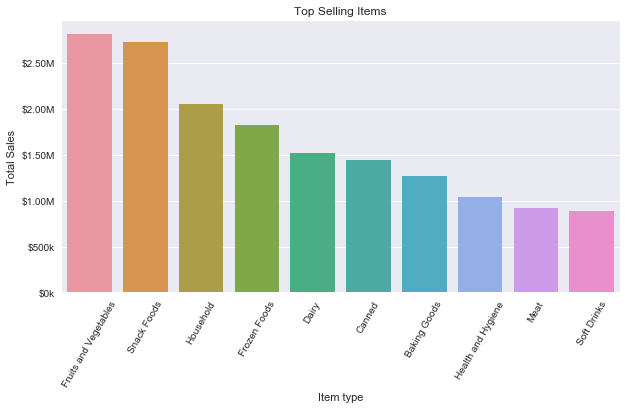

In [359]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data= top_10_sales, x= 'Item_Type', y= 'Item_Outlet_Sales', 
                  ax=ax, label = 'Total Sales')
ax.set(title = 'Top Selling Items',xlabel = 'Item type', ylabel = 'Total Sales')
formatter = FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=60)

### 3. Total sales in all Outlets.

In [24]:
outlet_sales = data.groupby('Outlet_Identifier')[['Item_Outlet_Sales']].sum().reset_index().sort_values(by = ['Item_Outlet_Sales'], ascending = False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

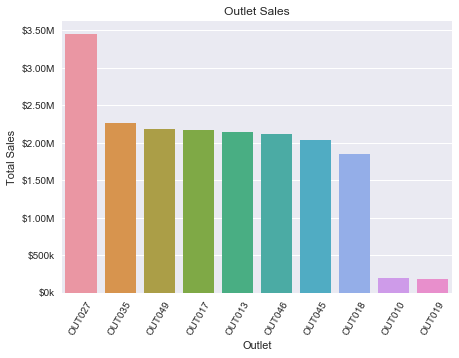

In [72]:
fig, ax = plt.subplots(figsize = (7,5))
sns.barplot(data= outlet_sales, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales',
                  ax= ax, label='Total Sales')
ax.set(title = 'Outlet Sales',xlabel = 'Outlet', ylabel = 'Total Sales')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 60)

### 4. Total sales for each Outlet type.

In [65]:
sales_outlet_type = data.groupby('Outlet_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by ='Item_Outlet_Sales', ascending = False)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

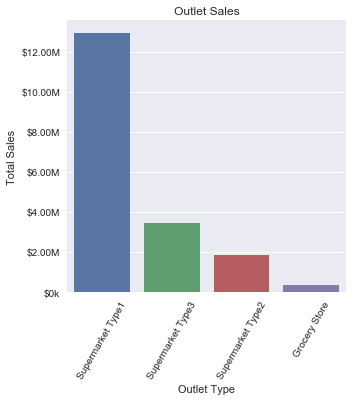

In [75]:
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data= sales_outlet_type, x= 'Outlet_Type', y= 'Item_Outlet_Sales', 
                       ax = ax, label ='Total sales')
ax.set(title = 'Outlet Sales',xlabel = 'Outlet Type', ylabel = 'Total Sales')
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation = 60)

### 5. Top 10 selling item for each outlet type.

In [465]:
x = data.groupby(['Outlet_Type','Item_Type'])['Outlet_Type', 'Item_Type','Item_Outlet_Sales'].sum().sort_values(by=['Outlet_Type','Item_Outlet_Sales'], ascending = [True,False])
x.reset_index(inplace=True)

In [466]:
# Identifying most selling items for each Outlet type.
Grocery_items = x.loc[x['Outlet_Type'] == 'Grocery Store',:]['Item_Type']
Supermarket_Type1_items = x.loc[x['Outlet_Type'] == 'Supermarket Type1',:]['Item_Type']
Supermarket_Type2_items = x.loc[x['Outlet_Type'] == 'Supermarket Type2',:]['Item_Type']
Supermarket_Type3_items = x.loc[x['Outlet_Type'] == 'Supermarket Type3',:]['Item_Type']

In [467]:
# Identifying total sales amount for most selling items for each Outlet type.
Grocery_sales = x.loc[x['Outlet_Type'] == 'Grocery Store',:]['Item_Outlet_Sales']
Supermarket_Type1_sales = x.loc[x['Outlet_Type'] == 'Supermarket Type1',:]['Item_Outlet_Sales']
Supermarket_Type2_sales = x.loc[x['Outlet_Type'] == 'Supermarket Type2',:]['Item_Outlet_Sales']
Supermarket_Type3_sales = x.loc[x['Outlet_Type'] == 'Supermarket Type3',:]['Item_Outlet_Sales']

Text(0.5,0.98,'Top 10 selling items for each item type')

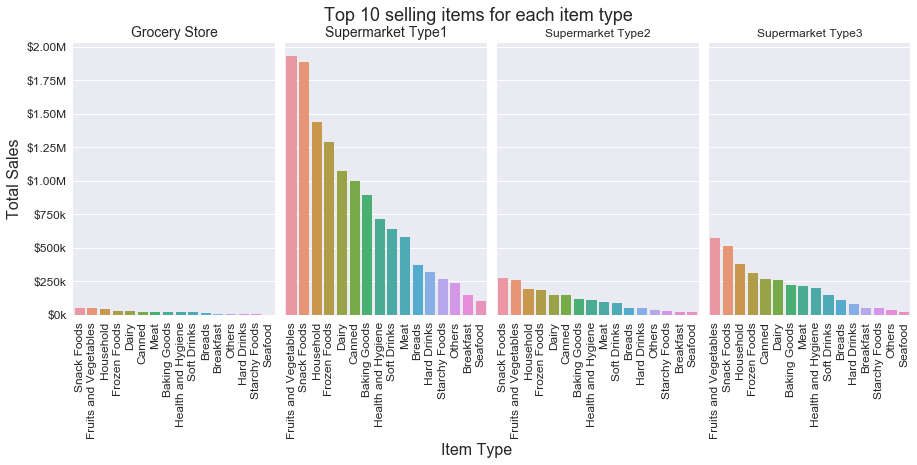

In [468]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols= 4,figsize=(15,5), sharey = True)
plt.subplots_adjust(wspace= 0.05)
sns.barplot(x= Grocery_items, y= Grocery_sales, ax = ax0)
ax0.set_title('Grocery Store', fontsize=14) 
ax0.set_xlabel('Item Type', size = 16)
ax0.set_ylabel('Total Sales', size = 16)
ax0.axes.get_xaxis().get_label().set_position((2,0))
formatter = FuncFormatter(currency)
ax0.yaxis.set_major_formatter(formatter)
ax0.tick_params('x',labelsize = 12, labelrotation = 90)
ax0.tick_params('y',labelsize = 12)

sns.barplot(x= Supermarket_Type1_items, y= Supermarket_Type1_sales, ax = ax1)
ax1.set_title('Supermarket Type1', fontsize=14)
ax1.axes.get_xaxis().get_label().set_visible(False)
ax1.axes.get_yaxis().get_label().set_visible(False)
ax1.tick_params('x',labelsize = 12, labelrotation = 90)

sns.barplot(x= Supermarket_Type2_items, y= Supermarket_Type2_sales, ax = ax2)
ax2.set(title = 'Supermarket Type2')
ax2.axes.get_xaxis().get_label().set_visible(False)
ax2.axes.get_yaxis().get_label().set_visible(False)
ax2.tick_params('x',labelsize = 12, labelrotation = 90)

sns.barplot(x= Supermarket_Type3_items, y= Supermarket_Type3_sales, ax = ax3)
ax3.set(title = 'Supermarket Type3')
ax3.axes.get_xaxis().get_label().set_visible(False)
ax3.axes.get_yaxis().get_label().set_visible(False)
ax3.tick_params('x',labelsize = 12, labelrotation = 90,)

fig.suptitle('Top 10 selling items for each item type', fontsize = 18)

### 6. Does Outlet Size affect Sales?

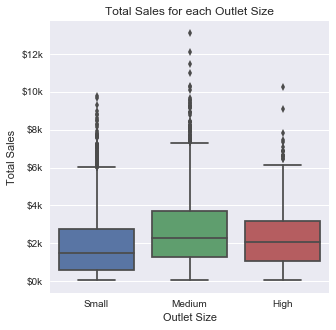

In [502]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=data, x = 'Outlet_Size', y= 'Item_Outlet_Sales',ax=ax, order=['Small', 'Medium','High'])
ax.set(title = 'Total Sales for each Outlet Size',xlabel = 'Outlet Size', ylabel = 'Total Sales')
ax.yaxis.set_major_formatter(formatter)

### 7. Do low price items sell more than ones with higher price?

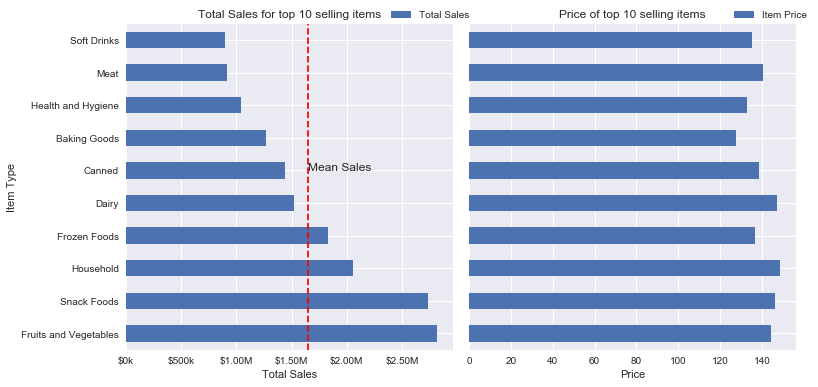

In [572]:
fig, (ax0,ax1) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6),sharey = True)
top_10_sales.plot(kind= 'barh' , x = 'Item_Type', y= 'Item_Outlet_Sales', ax=ax0,label = 'Total Sales')
top_10_sales.plot(kind= 'barh' , x = 'Item_Type', y= 'Item_MRP', ax=ax1,label = 'Item Price')
ax0.axvline(top_10_sales.Item_Outlet_Sales.mean(), color ='r', linestyle = '--')
ax0.text(top_10_sales.Item_Outlet_Sales.mean(),5,'Mean Sales', fontsize = 12)
ax0.set(title = 'Total Sales for top 10 selling items',ylabel = 'Item Type', xlabel = 'Total Sales')
ax0.xaxis.set_major_formatter(formatter)
ax0.legend(loc = (0.8,1))
ax1.set(title = 'Price of top 10 selling items', xlabel = 'Price')
ax1.legend(loc = (0.8,1))
plt.subplots_adjust(wspace= 0.05)

### 8. Does Item fat content affect sales?

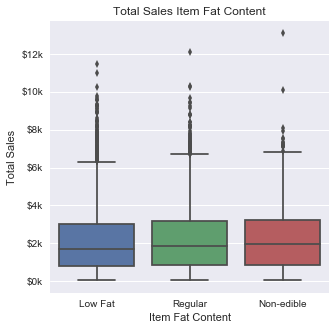

In [587]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=data, x = 'Item_Fat_Content', y= 'Item_Outlet_Sales',ax=ax)
ax.set(title = 'Total Sales Item Fat Content',xlabel = 'Item Fat Content', ylabel = 'Total Sales')
ax.yaxis.set_major_formatter(formatter)